# CUSTOMER RETENTION CASE-STUDY

In [1]:
#Importing the important packages  and libraries of the python.
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Loading the dataset into our pandas.
df=pd.read_excel("customer_retention_dataset.xlsx")
pd.set_option('display.max_columns', None)


In [3]:
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [4]:
#Checking the shape of the data.
df.shape

(269, 71)

In [5]:
#Renaming the columns for our convenience.
df = df.rename(columns={'1Gender of respondent':"Gender", '2 How old are you? ':"Age",
       '3 Which city do you shop online from?':"Shopping_city",
       '4 What is the Pin Code of where you shop online from?':"Pin_code_City",
       '5 Since How Long You are Shopping Online ?':"Shopping_Exp_Online",
       '6 How many times you have made an online purchase in the past 1 year?':"No_of_purchase_lastyear",
       '7 How do you access the internet while shopping on-line?':"Internet_Type",
       '8 Which device do you use to access the online shopping?': "Device_shopping",
       "9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ":"Screensize_Mobile","10 What is the operating system (OS) of your device?\t\t\t\t                                          ": "Operating_system", 
       "11 What browser do you run on your device to access the website?\t\t\t                                                          ":"Browser",                                                                                                                                                                          
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ': "mode_of_conn_online_store ", 
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ' :  "Mode _of_conn_again",                      
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ' : "Time_duration_purchase", 
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ': "Payment_mode",                   
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ' :"Frequency_abandoning_items", 
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ' :"Abandoned_bag_reasons",                                                                                                                                                      
       '18 The content on the website must be easy to read and understand':"content_of_website_easy_toread_understand",
       '19 Information on similar product to the one highlighted  is important for product comparison':"similar_product_comparision_imp",
       '20 Complete information on listed seller and product being offered is important for purchase decision.':"complete_info_listed_seller_product_imp_for_purchase_decision",
       '21 All relevant information on listed products must be stated clearly':"All_relevant_information_on_listed_products_must_be_stated_clearly",
       '22 Ease of navigation in website':"Ease of navigation in website", '23 Loading and processing speed': "loading_processing_speed",
       '24 User friendly Interface of the website':"userfriendly_interface_website",
       '25 Convenient Payment methods':"Convenient_pay_methods",
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':"Trust_online_store_fulfill_itspart_oftransaction_intime",
       '27 Empathy (readiness to assist with queries) towards the customers':"Readiness_to_help_customers",
       '28 Being able to guarantee the privacy of the customer': "Guarantee_privacy_of_customers",
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':"Customer_support_availability_by_modes",
       '30 Online shopping gives monetary benefit and discounts':"Monetary_benefits_online_shopping_discounts",
       '31 Enjoyment is derived from shopping online':"Enjoyment_from_online_shopping",
       '32 Shopping online is convenient and flexible':"onlineshopping_convenient_flexible",
       '33 Return and replacement policy of the e-tailer is important for purchase decision': "Importance_return_policy_replacement_policy",
       '34 Gaining access to loyalty programs is a benefit of shopping online':"loyality_program_benefit_shopping_online",
       '35 Displaying quality Information on the website improves satisfaction of customers':"Quality_info_website_improves_satisfaction",
       '36 User derive satisfaction while shopping on a good quality website or application':"Satisfaction_shopping_goodquality_website",
       '37 Net Benefit derived from shopping online can lead to users satisfaction':"benefit_derived_from_shopping_online_lead_users_satisfaction",
       '38 User satisfaction cannot exist without trust':"user_satisfaction_with_trust",
       '39 Offering a wide variety of listed product in several category':"wide_variety_product_category",
       '40 Provision of complete and relevant product information':"Complete_and_relevant_product_info",
       '41 Monetary savings':"Monetary_savings",
       '42 The Convenience of patronizing the online retailer':"Convenience_of_patronizing_online_retailer",
       '43 Shopping on the website gives you the sense of adventure':"Sense_of_adventure",
       '44 Shopping on your preferred e-tailer enhances your social status':"Social_status_enhancement_by_shopping_retailer",
       '45 You feel gratification shopping on your favorite e-tailer':"Gratification_feeling_favourite_retailer",
       '46 Shopping on the website helps you fulfill certain roles':"Shopping_website_helps_you_fulfill_certainroles" ,
       '47 Getting value for money spent': "Value_for_money",
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':"online_retailer_shopped_from" ,'Easy to use website or application': "easy_to_use_website_application",'Visual appealing web-page layout': "Visual_appealing_webpage", 'Wild variety of product on offer':"wild_variety_product_offer",
       'Complete, relevant description information of products':"Complete_relevant_description_about_product",
       'Fast loading website speed of website and application':"Fast loading_website_application",
       'Reliability of the website or application':"Reliability_of_website_application",
       'Quickness to complete purchase':"Quickness_shopping",
       'Availability of several payment options':"Availability_of_payment_options", 'Speedy order delivery ':"speedy_order_delivery",
       'Privacy of customers’ information':"Privacy_of_customers",
       'Security of customer financial information':"security_of_customer_fin_info",
       'Perceived Trustworthiness':"Perceived_trustworthiness",
       'Presence of online assistance through multi-channel':"Presence_onlin_assist_multichannel",
       'Longer time to get logged in (promotion, sales period)':"Longer_time_to_get_logged_in",
       'Longer time in displaying graphics and photos (promotion, sales period)':"long_tim_displ_graphics_photos",
       'Late declaration of price (promotion, sales period)': "late_decl_of_price",
       'Longer page loading time (promotion, sales period)':"Longer_pag_load_tim",
       'Limited mode of payment on most products (promotion, sales period)':"Constraint_on_mostproducts_payment",
       'Longer delivery period':"Long_del_period", 'Change in website/Application design':"Website_&_application_change",
       'Frequent disruption when moving from one page to another':"Frequent_disruption_pageschanging",
       'Website is as efficient as before':"Efficient_website",
       'Which of the Indian online retailer would you recommend to a friend?':"Online_retailer_reccom"})

In [6]:
df.head(1)

Gender          Age Shopping_city  Pin_code_City Shopping_Exp_Online  \
0   Male  31-40 years         Delhi         110009       Above 4 years   

  No_of_purchase_lastyear Internet_Type Device_shopping Screensize_Mobile  \
0             31-40 times       Dial-up         Desktop            Others   

        Operating_system        Browser mode_of_conn_online_store   \
0  Window/windows Mobile  Google chrome              Search Engine   

  Mode _of_conn_again Time_duration_purchase  \
0       Search Engine              6-10 mins   

                         Payment_mode Frequency_abandoning_items  \
0  E-wallets (Paytm, Freecharge etc.)                  Sometimes   

  Abandoned_bag_reasons content_of_website_easy_toread_understand  \
0         Lack of trust                                 Agree (4)   

  similar_product_comparision_imp  \
0                 Indifferent (3)   

  complete_info_listed_seller_product_imp_for_purchase_decision  \
0                                    Indifferent (3)              

  All_relevant_information_on_listed_products_must_be_stated_clearly  \
0                                          Agree (4)                   

  Ease of navigation in website loading_processing_speed  \
0                     Agree (4)    Strongly disagree (1)   

  userfriendly_interface_website Convenient_pay_methods  \
0                  Dis-agree (2)          Dis-agree (2)   

  Trust_online_store_fulfill_itspart_oftransaction_intime  \
0                                       Disagree (2)        

  Readiness_to_help_customers Guarantee_privacy_of_customers  \
0          Strongly agree (5)                      Agree (4)   

  Customer_support_availability_by_modes  \
0                              Agree (4)   

  Monetary_benefits_online_shopping_discounts Enjoyment_from_online_shopping  \
0                             indifferent (3)          Strongly disagree (1)   

  onlineshopping_convenient_flexible  \
0                      Dis-agree (2)   

  Importance_return_policy_replacement_policy  \
0                               Dis-agree (2)   

  loyality_program_benefit_shopping_online  \
0                                Agree (4)   

  Quality_info_website_improves_satisfaction  \
0                            indifferent (3)   

  Satisfaction_shopping_goodquality_website  \
0                        Strongly agree (5)   

  benefit_derived_from_shopping_online_lead_users_satisfaction  \
0                                          Agree (4)             

  user_satisfaction_with_trust wide_variety_product_category  \
0           Strongly agree (5)               indifferent (3)   

  Complete_and_relevant_product_info Monetary_savings  \
0                    indifferent (3)     Disagree (2)   

  Convenience_of_patronizing_online_retailer Sense_of_adventure  \
0                            indifferent (3)          Agree (4)   

  Social_status_enhancement_by_shopping_retailer  \
0                                      Agree (4)   

  Gratification_feeling_favourite_retailer  \
0                       Strongly agree (5)   

  Shopping_website_helps_you_fulfill_certainroles     Value_for_money  \
0                                       Agree (4)  Strongly agree (5)   

  online_retailer_shopped_from easy_to_use_website_application  \
0         Amazon.in, Paytm.com                       Paytm.com   

  Visual_appealing_webpage wild_variety_product_offer  \
0             Flipkart.com               Flipkart.com   

  Complete_relevant_description_about_product  \
0                                Snapdeal.com   

  Fast loading_website_application Reliability_of_website_application  \
0                     Snapdeal.com                          Paytm.com   

  Quickness_shopping Availability_of_payment_options speedy_order_delivery  \
0          Paytm.com                       Patym.com             Amazon.in   

  Privacy_of_customers security_of_customer_fin_info  \
0            Amazon.in                     Amazon.in   

 

In [7]:
fm=df.to_excel("fm.xlsx") 

In [8]:
#checking the names of the columns.
df.columns

Index(['Gender', 'Age', 'Shopping_city', 'Pin_code_City',
       'Shopping_Exp_Online', 'No_of_purchase_lastyear', 'Internet_Type',
       'Device_shopping', 'Screensize_Mobile', 'Operating_system', 'Browser',
       'mode_of_conn_online_store ', 'Mode _of_conn_again',
       'Time_duration_purchase', 'Payment_mode', 'Frequency_abandoning_items',
       'Abandoned_bag_reasons', 'content_of_website_easy_toread_understand',
       'similar_product_comparision_imp',
       'complete_info_listed_seller_product_imp_for_purchase_decision',
       'All_relevant_information_on_listed_products_must_be_stated_clearly',
       'Ease of navigation in website', 'loading_processing_speed',
       'userfriendly_interface_website', 'Convenient_pay_methods',
       'Trust_online_store_fulfill_itspart_oftransaction_intime',
       'Readiness_to_help_customers', 'Guarantee_privacy_of_customers',
       'Customer_support_availability_by_modes',
       'Monetary_benefits_online_shopping_discounts',
       

In [9]:
#Getting information of null_count and Dtype for each column of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Gender                                                              269 non-null    object
 1   Age                                                                 269 non-null    object
 2   Shopping_city                                                       269 non-null    object
 3   Pin_code_City                                                       269 non-null    int64 
 4   Shopping_Exp_Online                                                 269 non-null    object
 5   No_of_purchase_lastyear                                             269 non-null    object
 6   Internet_Type                                                       269 non-null    object
 7   Device_shopping           

> GREAT!  We do not have any null values present in our dataset.

In [10]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df["Gender"].value_counts()

Female    181
Male       88
Name: Gender, dtype: int64

In [12]:
df["Shopping_city"].unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

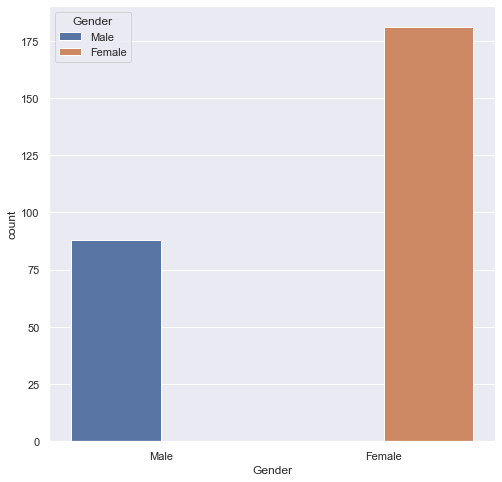

In [64]:
#Lets do the countplot on gender column.
ax = sns.countplot(x="Gender",hue="Gender", data=df)
fig = px.pie(df, names='Gender', title='Gender')
fig.show()

>We can see that Female(181) respondents are more in comparision to the Male(88) respondents.

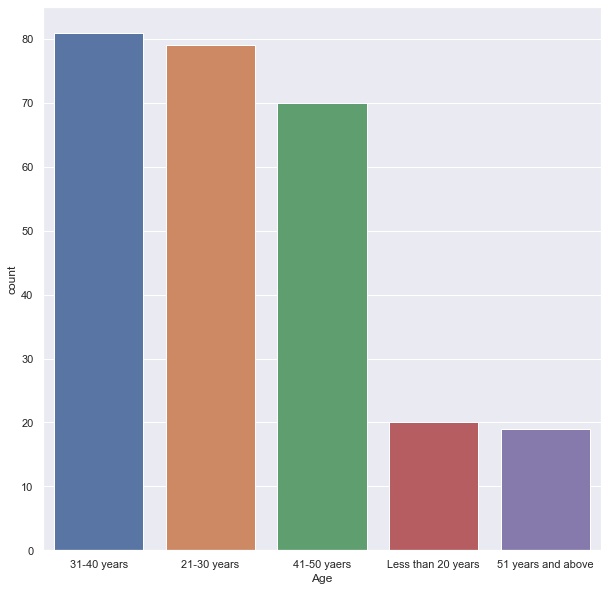

In [57]:
#Lets do the countplot  and pie chart on the Age column.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Age", data=df)

fig = px.pie(df, names='Age', title='Age of the respondents')
fig.show()

>From the plots we can clearly see that most of the respondents fall into the following three categories:-
    
    1. 31-40 years
    
    2. 21-30 years
    
    3. 41-50 years
    
>Very few respondents fall into the categories :-
    
    1. Less than 20 years
    
    2. 51 years and above.

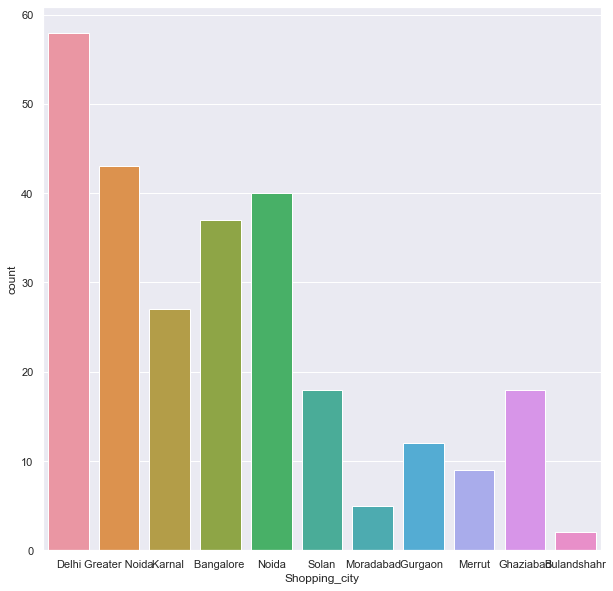

In [14]:
#Lets do the countplot  and pie chart on the shopping_city column.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Shopping_city", data=df)

fig = px.pie(df, names='Shopping_city', title='Product Shopping City')
fig.show()

>We can see that most people are ordering from Delhi & least people are ordering from Bulandshahr

>Shopping_cities in decreasing order: 1.Delhi

                                      2.Greater Noida
                                      
                                      3.Noida
                                      
                                      4.Bangalore
                                      
                                      5.Karnal
                                      
                                      6.Solan
                                      
                                      7.Ghaziabad
                                      
                                      8.Gurgaon

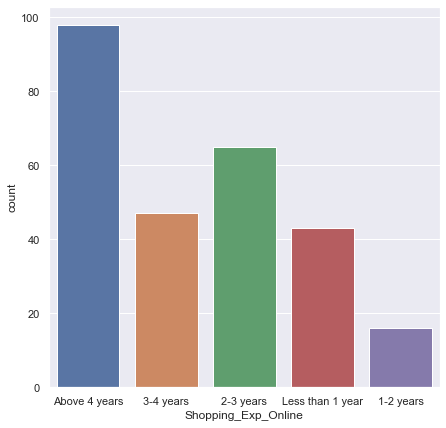

In [15]:
#Lets do the countplot on the Shopping_Exp_Online column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Shopping_Exp_Online", data=df)

>We can see that most of the online shoppers of our dataset have more than 4 years experience

>Very few of the shoppers have experience of 1-2 years.

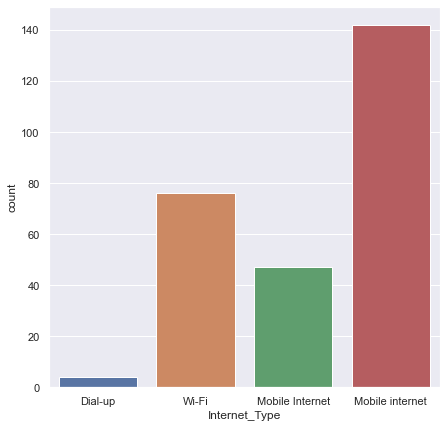

In [16]:
#Lets do the countplot  and piechart on the Internet_Type column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Internet_Type", data=df)

fig = px.pie(df, names='Internet_Type', title='Type of internet used for online shopping')
fig.show()


>From the above plots we can conclude that most of people depend on "Mobile Internet" & followed by "Wi-Fi" for the online shopping.

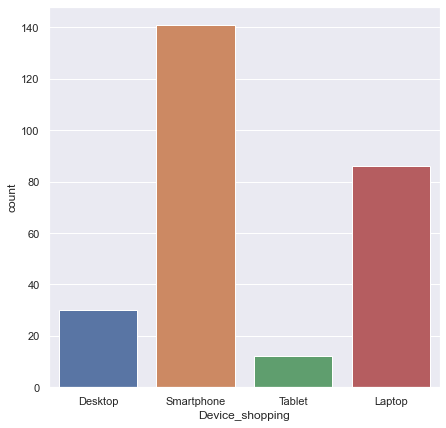

In [17]:
#Lets do the countplot  and piechart on the Device_shopping column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Device_shopping", data=df)
fig = px.pie(df, names='Device_shopping', title='Device used for the shopping')
fig.show()

> Above plots clearly say that "Smartphone" is the most popular device followed by the "Laptop".

In [18]:
df.head(2)

Gender          Age Shopping_city  Pin_code_City Shopping_Exp_Online  \
0    Male  31-40 years         Delhi         110009       Above 4 years   
1  Female  21-30 years         Delhi         110030       Above 4 years   

  No_of_purchase_lastyear Internet_Type Device_shopping Screensize_Mobile  \
0             31-40 times       Dial-up         Desktop            Others   
1      41 times and above         Wi-Fi      Smartphone        4.7 inches   

        Operating_system        Browser mode_of_conn_online_store   \
0  Window/windows Mobile  Google chrome              Search Engine   
1                IOS/Mac  Google chrome              Search Engine   

  Mode _of_conn_again Time_duration_purchase  \
0       Search Engine              6-10 mins   
1     Via application      more than 15 mins   

                         Payment_mode Frequency_abandoning_items  \
0  E-wallets (Paytm, Freecharge etc.)                  Sometimes   
1                  Credit/Debit cards            Very frequently   

       Abandoned_bag_reasons content_of_website_easy_toread_understand  \
0              Lack of trust                                 Agree (4)   
1  Promo code not applicable                        Strongly agree (5)   

  similar_product_comparision_imp  \
0                 Indifferent (3)   
1              Strongly agree (5)   

  complete_info_listed_seller_product_imp_for_purchase_decision  \
0                                    Indifferent (3)              
1                                 Strongly agree (5)              

  All_relevant_information_on_listed_products_must_be_stated_clearly  \
0                                          Agree (4)                   
1                                 Strongly agree (5)                   

  Ease of navigation in website loading_processing_speed  \
0                     Agree (4)    Strongly disagree (1)   
1            Strongly agree (5)       Strongly agree (5)   

  userfriendly_interface_website Convenient_pay_methods  \
0                  Dis-agree (2)          Dis-agree (2)   
1             Strongly agree (5)     Strongly agree (5)   

  Trust_online_store_fulfill_itspart_oftransaction_intime  \
0                                       Disagree (2)        
1                                 Strongly agree (5)        

  Readiness_to_help_customers Guarantee_privacy_of_customers  \
0          Strongly agree (5)                      Agree (4)   
1          Strongly agree (5)             Strongly agree (5)   

  Customer_support_availability_by_modes  \
0                              Agree (4)   
1                     Strongly agree (5)   

  Monetary_benefits_online_shopping_discounts Enjoyment_from_online_shopping  \
0                             indifferent (3)          Strongly disagree (1)   
1                          Strongly agree (5)             Strongly agree (5)   

  onlineshopping_convenient_flexible  \
0                      Dis-agree (2)   
1                 Strongly agree (5)   

  Importance_return_policy_replacement_policy  \
0                               Dis-agree (2)   
1                          Strongly agree (5)   

  loyality_program_benefit_shopping_online  \
0                                Agree (4)   
1                       Strongly agree (5)   

  Quality_info_website_improves_satisfaction  \
0                            indifferent (3)   
1                         Strongly agree (5)   

  Satisfaction_shopping_goodquality_website  \
0                        Strongly agree (5)   
1                        Strongly agree (5)   

  benefit_derived_from_shopping_online_lead_users_satisfaction  \
0                                          Agree (4)             
1                                 Strongly agree (5)             

  user_satisfaction_with_trust wide_variety_product_category  \
0           Strongly agree (5)               indifferent (3)   
1           Strongly agree (5)            Strongly agree (5)   

  Complete_and_relevant_product_i

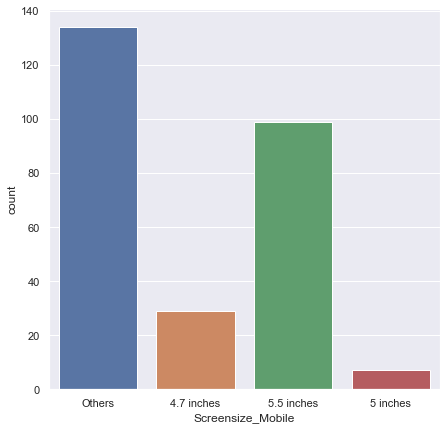

In [19]:
#Lets do the countplot  and piechart Screensize column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Screensize_Mobile", data=df)
fig = px.pie(df, names='Screensize_Mobile', title='Screensize of mobile phone used while shopping.')
fig.show()

>The data which we have it is saying most people have screen size apart from 4.7,5.5,5 inches.

>Next to that most people have 5.5 inches of screensize of the mobile.

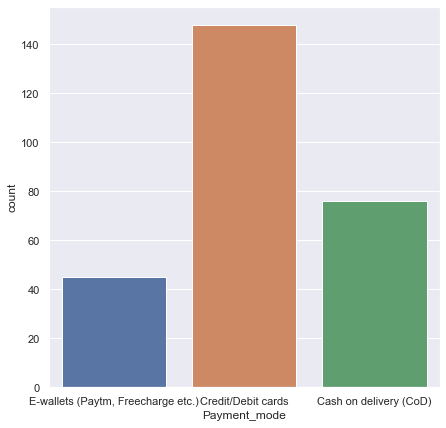

In [20]:
#Lets do the countplot  and piechart for Payment_mode column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Payment_mode", data=df)
fig = px.pie(df, names='Payment_mode', title='Mode of payment for online shopping')
fig.show()

>We can see that most people prefer Credit/Debit card for their payment options.

>After Credit/Debit card comes the Cash on Delivery(COD).

>Least people go with E-wallets(Paytm,Freecharge).

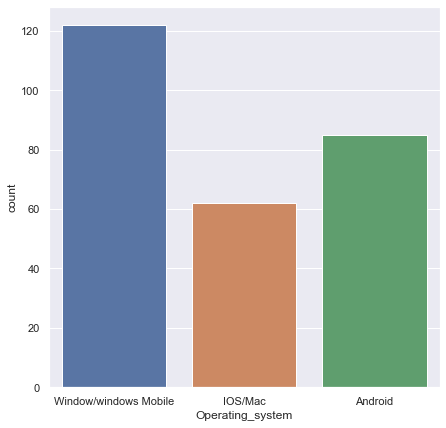

In [21]:
#Lets do the countplot  and piechart for Operating_system column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Operating_system", data=df)
fig = px.pie(df, names='Operating_system', title='Operating system of the device')
fig.show()

>Most people are using the windows phone followed by the Android.

>Very few people are using the IOS/MAC_operating_system.

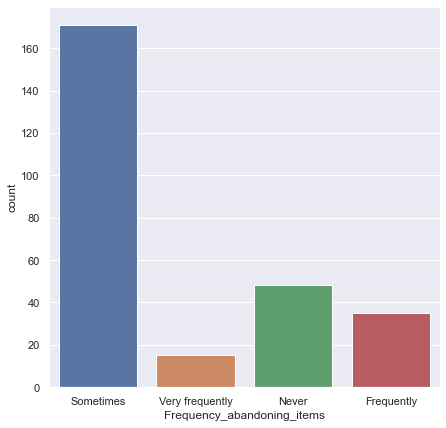

In [22]:
#Lets do the countplot  and piechart for Frequency_abandoning_items column.
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.countplot(x="Frequency_abandoning_items", data=df)
fig = px.pie(df, names='Frequency_abandoning_items', title='Operating system of the device')
fig.show()

>Sometimes most of the people do abandoned the items in list while shopping online.

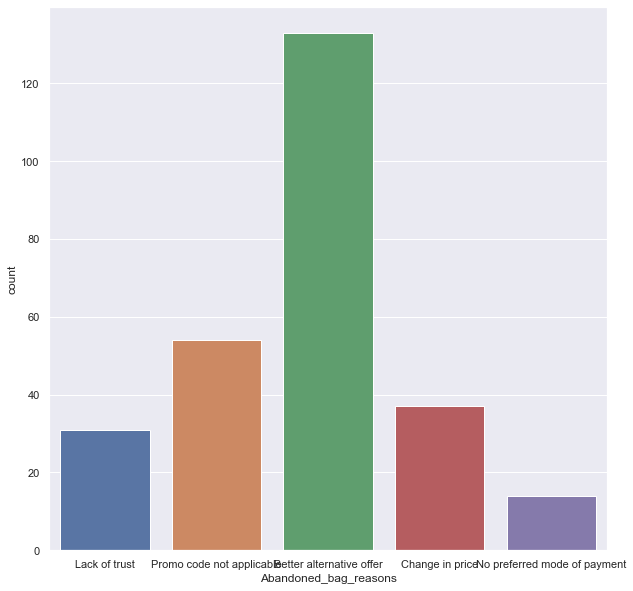

In [23]:
#Lets do the countplot  and piechart for abandoned_bag_reasons column.
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="Abandoned_bag_reasons", data=df)
fig = px.pie(df, names='Abandoned_bag_reasons', title='Items Abandoned reasons')
fig.show()

> Most people abandoned the items of their list because they have " Better_alternative_offers" followed by "Promo code not applicable".

In [24]:
df.columns

Index(['Gender', 'Age', 'Shopping_city', 'Pin_code_City',
       'Shopping_Exp_Online', 'No_of_purchase_lastyear', 'Internet_Type',
       'Device_shopping', 'Screensize_Mobile', 'Operating_system', 'Browser',
       'mode_of_conn_online_store ', 'Mode _of_conn_again',
       'Time_duration_purchase', 'Payment_mode', 'Frequency_abandoning_items',
       'Abandoned_bag_reasons', 'content_of_website_easy_toread_understand',
       'similar_product_comparision_imp',
       'complete_info_listed_seller_product_imp_for_purchase_decision',
       'All_relevant_information_on_listed_products_must_be_stated_clearly',
       'Ease of navigation in website', 'loading_processing_speed',
       'userfriendly_interface_website', 'Convenient_pay_methods',
       'Trust_online_store_fulfill_itspart_oftransaction_intime',
       'Readiness_to_help_customers', 'Guarantee_privacy_of_customers',
       'Customer_support_availability_by_modes',
       'Monetary_benefits_online_shopping_discounts',
       

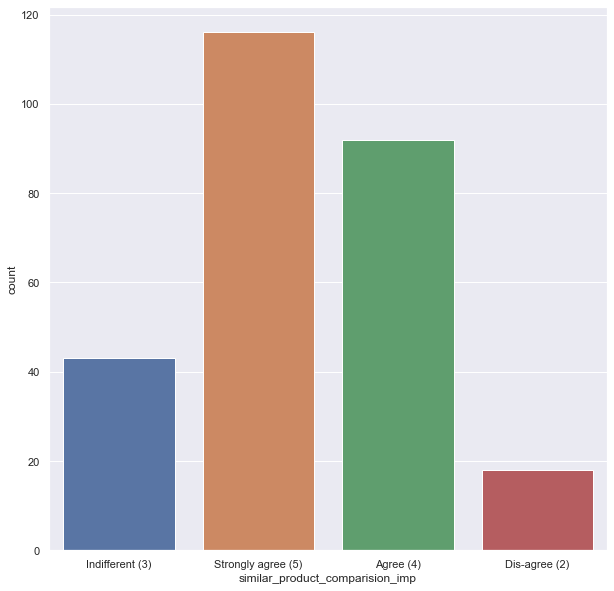

In [25]:
#Lets do the countplot  and piechart for similar_product_comparision column.
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="similar_product_comparision_imp", data=df)
fig = px.pie(df, names='similar_product_comparision_imp', title='Importance of Similar Product Comparision ')
fig.show()

>Most people strongly agree that product comparision is very much important.

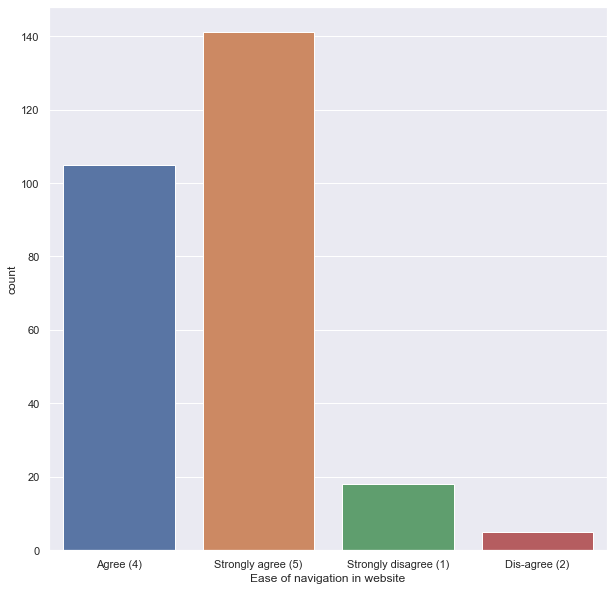

In [26]:
#Lets do the countplot  and piechart for Ease of navigation in website column.
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="Ease of navigation in website", data=df)
fig = px.pie(df, names='Ease of navigation in website', title='Importance of ease in navigation of website')
fig.show()

>Mostly people strongly agree that "ease in navigation of website" is very important.

>Very less people dis-agree with "Important of ease in navigation of website".

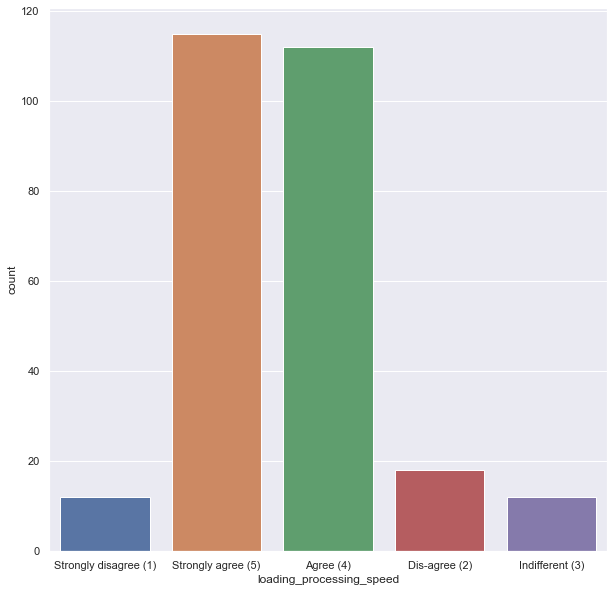

In [27]:
#Lets do the countplot  and piechart for loading_processing_speed in website column.
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="loading_processing_speed", data=df)
fig = px.pie(df, names='loading_processing_speed', title='Importance of loading_processing_speed')
fig.show()

>Mostly people strongly agree with the importance of loading_processing_speed.

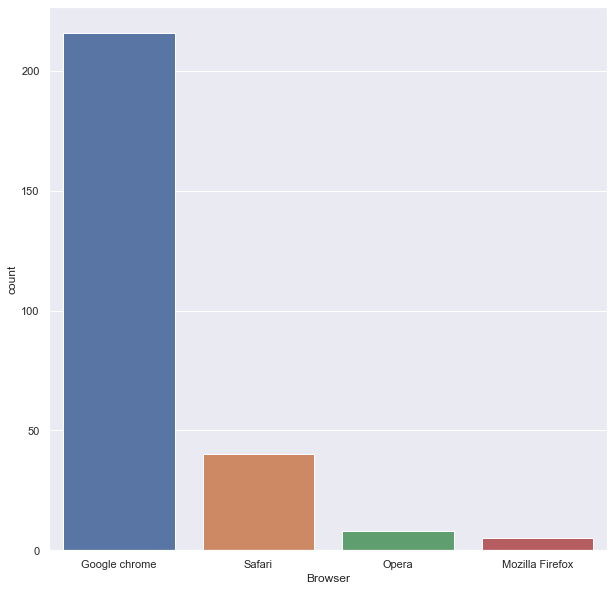

In [28]:
#Lets do the countplot  and piechart for Browser column.
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="Browser", data=df)
fig = px.pie(df, names='Browser', title='Different Browsers')
fig.show()

>We can see that mostly people use "Google_chrome" followed by "Safari".

>Very less people use "Mozilla Firefox" & "Opera".

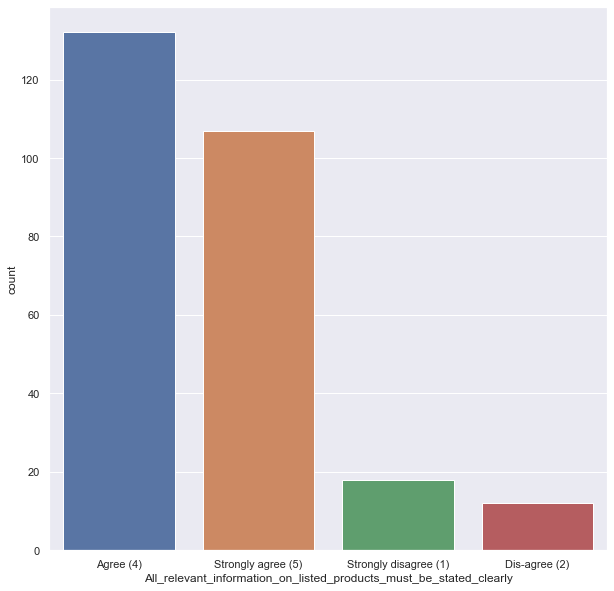

In [29]:
#Lets do the countplot  and piechart for All_relevant_information_on_listed_products_must_be_stated_clearly column.
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="All_relevant_information_on_listed_products_must_be_stated_clearly", data=df)
fig = px.pie(df, names='All_relevant_information_on_listed_products_must_be_stated_clearly', title='Importance_of_all_relevant_information_on_listed_products_must_be_stated_clearly')
fig.show()

>From the above plots we can say that most of the people agree with "Importance of all relevant information on listed products must be stated clearly".

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: userfriendly_interface_website, dtype: int64

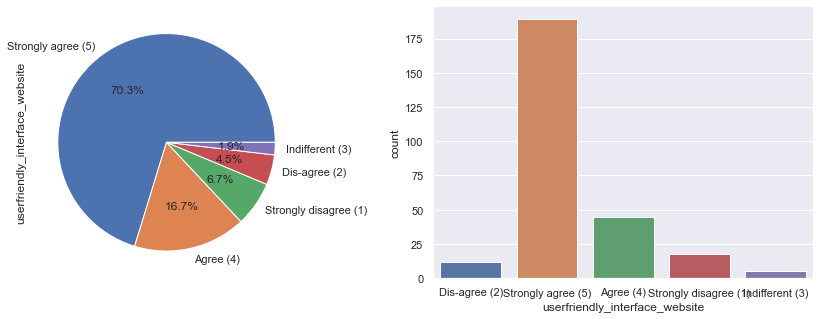

In [30]:
#Plotting countplot and piechart for the userfriendly_interface_website.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['userfriendly_interface_website'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['userfriendly_interface_website'])
df['userfriendly_interface_website'].value_counts()

>We can see that most of our respondents strongly agree to the point that "userfriendly interface of the website" is very important.

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient_pay_methods, dtype: int64

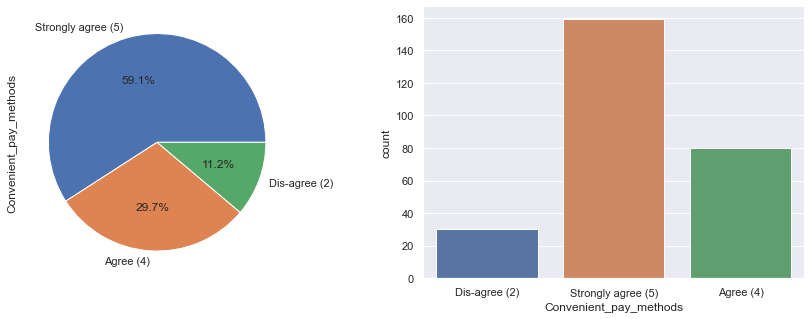

In [31]:
#Plotting countplot and piechart for Convenient_pay_methods column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Convenient_pay_methods'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Convenient_pay_methods'])
df['Convenient_pay_methods'].value_counts()

>Many of the respondents strongly believe that if payment methods are convenient then it will be good for online shoppers.

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Readiness_to_help_customers, dtype: int64

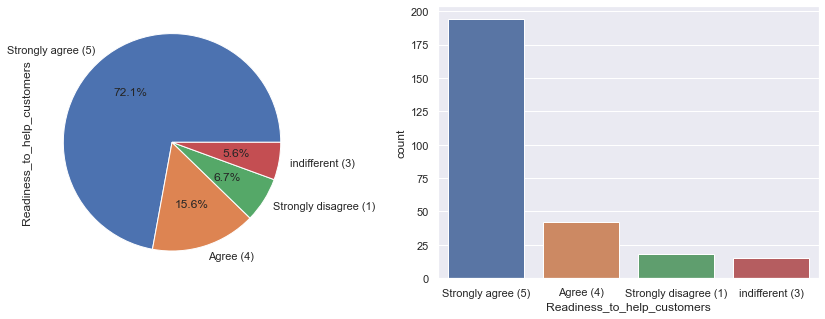

In [32]:
#Plotting countplot and piechart for Readiness_to_help_customers column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Readiness_to_help_customers'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Readiness_to_help_customers'])
df['Readiness_to_help_customers'].value_counts()

>Most of Customers firmly believe that approach of "Readiness to help the customers always" is the most important concern.

In [33]:
df.columns

Index(['Gender', 'Age', 'Shopping_city', 'Pin_code_City',
       'Shopping_Exp_Online', 'No_of_purchase_lastyear', 'Internet_Type',
       'Device_shopping', 'Screensize_Mobile', 'Operating_system', 'Browser',
       'mode_of_conn_online_store ', 'Mode _of_conn_again',
       'Time_duration_purchase', 'Payment_mode', 'Frequency_abandoning_items',
       'Abandoned_bag_reasons', 'content_of_website_easy_toread_understand',
       'similar_product_comparision_imp',
       'complete_info_listed_seller_product_imp_for_purchase_decision',
       'All_relevant_information_on_listed_products_must_be_stated_clearly',
       'Ease of navigation in website', 'loading_processing_speed',
       'userfriendly_interface_website', 'Convenient_pay_methods',
       'Trust_online_store_fulfill_itspart_oftransaction_intime',
       'Readiness_to_help_customers', 'Guarantee_privacy_of_customers',
       'Customer_support_availability_by_modes',
       'Monetary_benefits_online_shopping_discounts',
       

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Guarantee_privacy_of_customers, dtype: int64

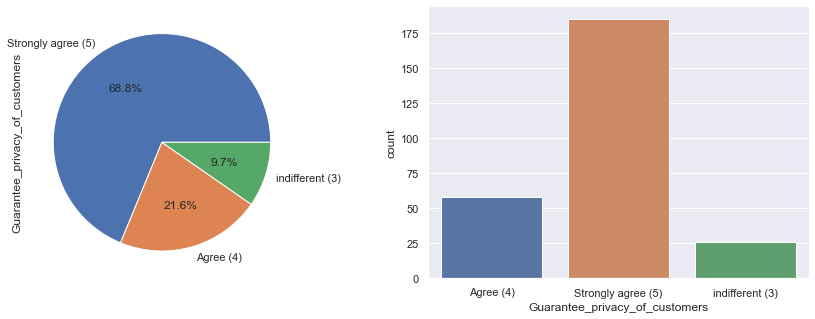

In [34]:
#Plotting countplot and piechart for Guarantee_privacy_of_customers column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Guarantee_privacy_of_customers'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Guarantee_privacy_of_customers'])
df['Guarantee_privacy_of_customers'].value_counts()

>As we all know that privacy is the most vital thing as all the customers data like credit-card number, debit-card number, are stored in the retailers database, and customer believes on the company that it will not breach the private data policy.

>Our records also shows that most of customers strongly beleive that online store must guarantee the privacy of the data of customers.

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Customer_support_availability_by_modes, dtype: int64

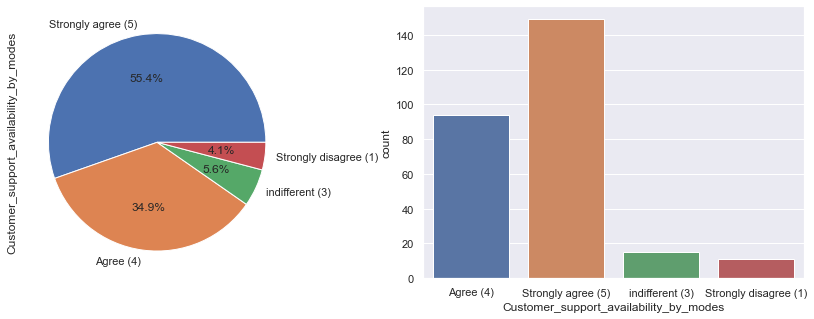

In [35]:
#Plotting countplot and piechart for Customer_support_availability_by_modes column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Customer_support_availability_by_modes'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Customer_support_availability_by_modes'])
df['Customer_support_availability_by_modes'].value_counts()

>Most of the customers expect that their online store must provide the assistance to them through various modes like ("Email","Text messages","Phone Call").

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Monetary_benefits_online_shopping_discounts, dtype: int64

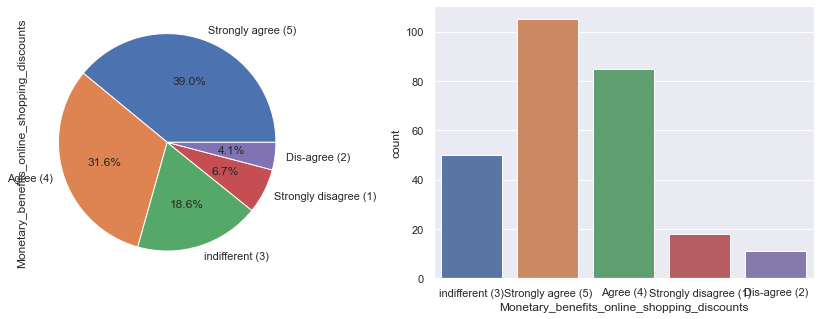

In [36]:
#Plotting countplot and piechart for Monetary_benefits_online_shopping_discounts column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Monetary_benefits_online_shopping_discounts'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Monetary_benefits_online_shopping_discounts'])
df['Monetary_benefits_online_shopping_discounts'].value_counts()

>Mostly of the customers are inclined towards the perks of monetary benefits while shopping in the forms of coupons,discount offers etc.


Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Enjoyment_from_online_shopping, dtype: int64

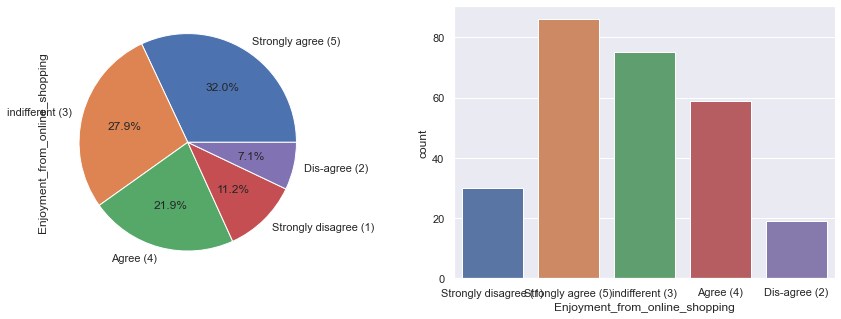

In [37]:
#Plotting countplot and piechart for Enjoyment_from_online_shopping column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Enjoyment_from_online_shopping'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Enjoyment_from_online_shopping'])
df['Enjoyment_from_online_shopping'].value_counts()

>Most people agree that they enjoy the online shopping.

>Many of respondents are also unconcerned about the enjoyment.

>Very few of them disagree with the fact of enjoyment while online shopping.

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Importance_return_policy_replacement_policy, dtype: int64

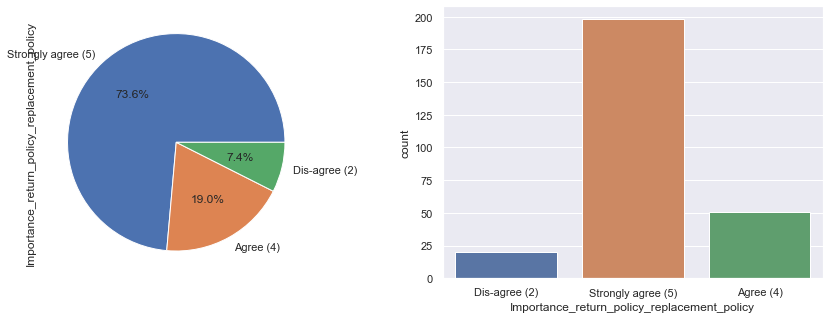

In [38]:
#Plotting countplot and piechart for Importance_return_policy_replacement_policy column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Importance_return_policy_replacement_policy'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Importance_return_policy_replacement_policy'])
df['Importance_return_policy_replacement_policy'].value_counts()

>As we all know that replacement and return policy is very much important for a customer since if the product which he/she buyed didnt performing well then they can return it to the seller without any problem by giving proper reason of return of product.

>Most of the customers are agreeing with the fact that there must be customer friendly return or replacement policy must be present in the company.

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: Quality_info_website_improves_satisfaction, dtype: int64

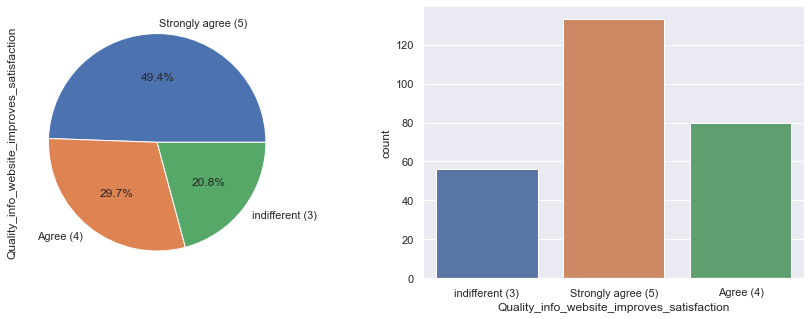

In [39]:
#Plotting countplot and piechart for Quality_info_website_improves_satisfaction column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Quality_info_website_improves_satisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Quality_info_website_improves_satisfaction'])
df['Quality_info_website_improves_satisfaction'].value_counts()

>We all know that quality information about the product helps us to understand the product well and we can decide upon reading the details whether to go for the shopping or not.

>Customers are strongly agreeing with importance of the presence of the quality information present in the dashboard improves the satisfaction of the customers.

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Value_for_money, dtype: int64

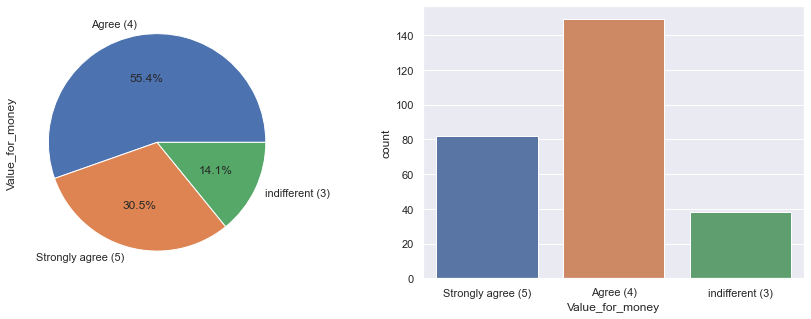

In [40]:
#Plotting countplot and piechart for Value_for_money column.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Value_for_money'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Value_for_money'])
df['Value_for_money'].value_counts()

>All of us expect value for the money whenever we shop anything from anywhere.

>Here also the respondents are also stick to the value for money statement. 

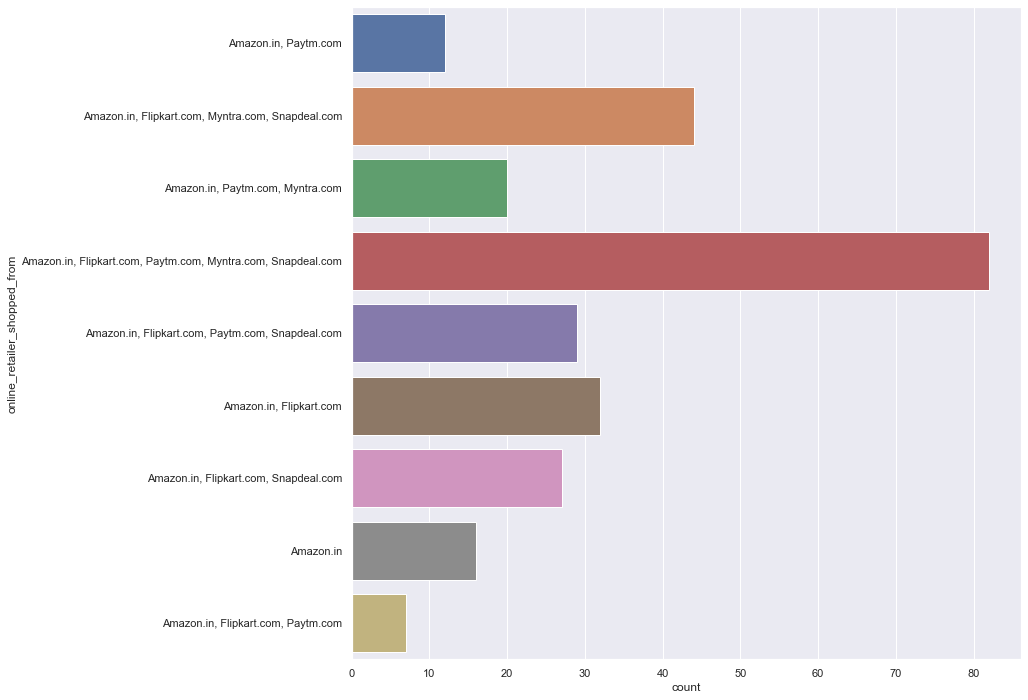

In [41]:
#Plotting countplot and piechart for online_retailer_shopped_from column.
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.countplot(y="online_retailer_shopped_from", data=df)
fig = px.pie(df, names='online_retailer_shopped_from', title='Different online retailers')
fig.show()

>Most of the Customers have shopped from  all ("Amazon","Flipkart","Paytm","Myntra","Snapdeal").

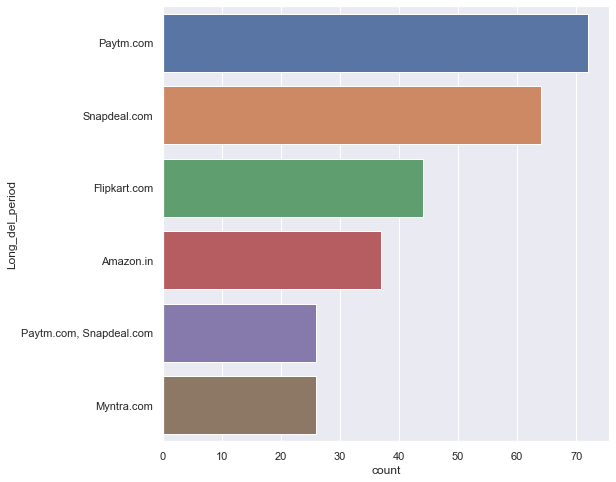

In [42]:
#Plotting countplot and piechart for LONGER DELIVER PERIOD column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Long_del_period", data=df)
fig = px.pie(df, names='Long_del_period', title='Longer delivery period')
fig.show()

>From the above data given by the respondents we can clearly say that most quickly delivering website is 'Myntra'

>From the data ,most lately delivering website is "Paytm".

>Flipkart and Amazon both deliver the product on average time.

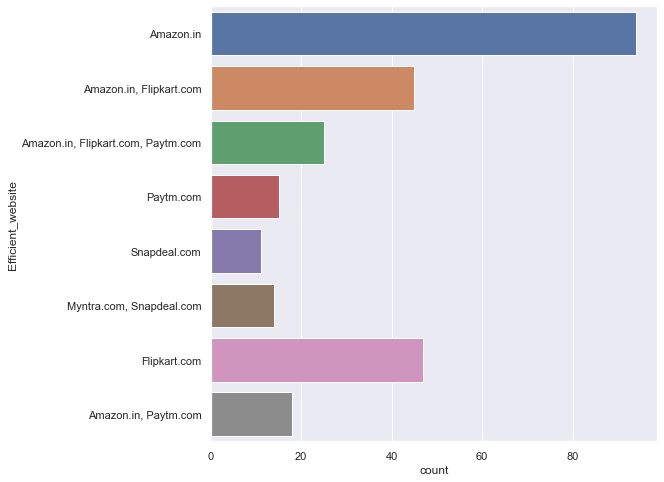

In [43]:
#Plotting countplot and piechart foR Efficient_website column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Efficient_website", data=df)
fig = px.pie(df, names='Efficient_website', title='Efficient Websites')
fig.show()


>From the polls we can say that most efficient website is "Amazon" followed by "Flipkart".

>Most inefficient website is "snapdeal".

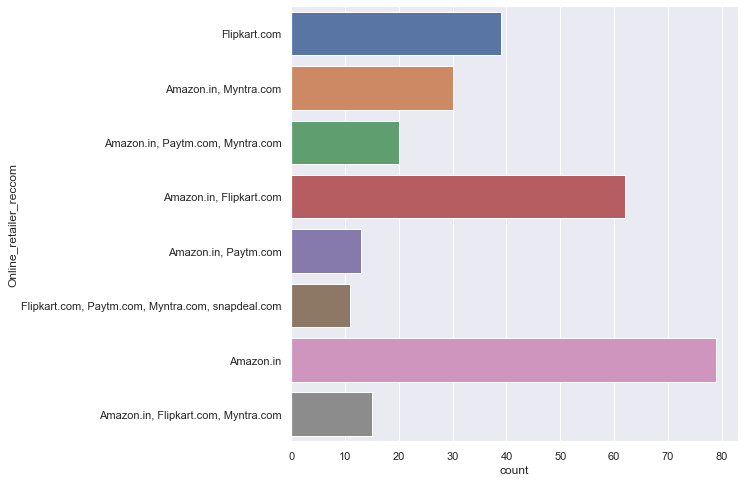

In [44]:
#Plotting countplot and piechart foR Online_retailer_reccom column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Online_retailer_reccom", data=df)
fig = px.pie(df, names='Online_retailer_reccom', title='Recommendation of online stores to others')
fig.show()

>We can see that mostly people are recommending "Amazon.com" & "Flipkart.com" to others.

>Least recommended website is "Paytm" & "Snapdeal".

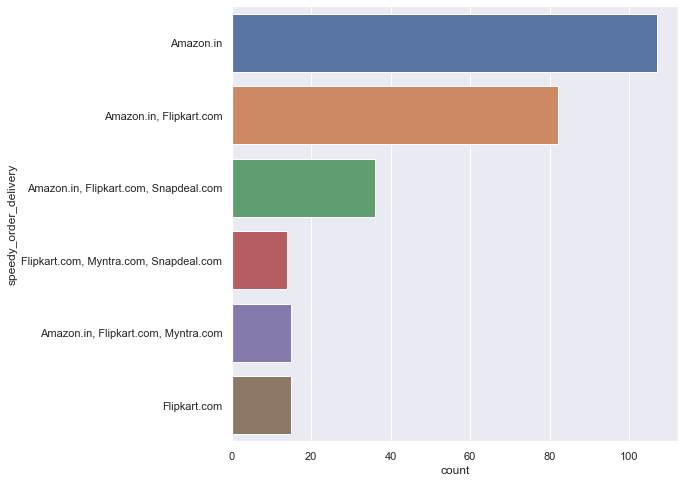

In [45]:
#Plotting countplot and piechart foR speedy_order_delivery column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="speedy_order_delivery", data=df)
fig = px.pie(df, names='speedy_order_delivery', title='Delivery speed of different online retailers')
fig.show()

>We can see that "Amazon.com" delivers the product fastly followed by the "Flipkart.com".



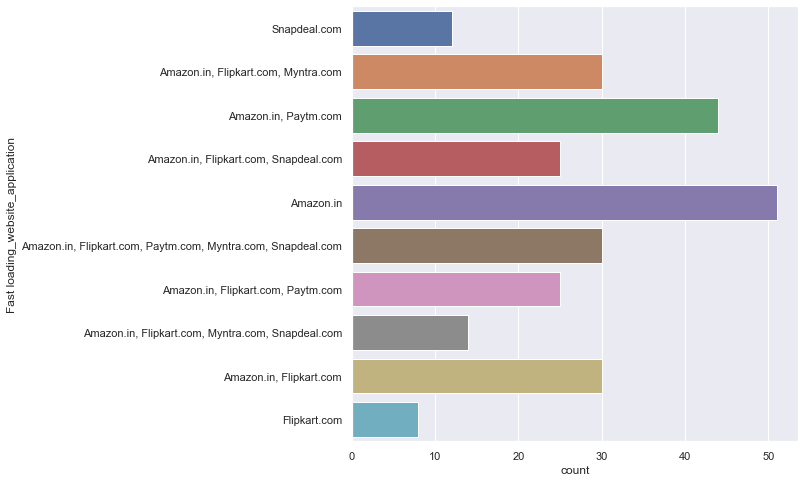

In [46]:
#Plotting countplot and piechart foR Fast loading_website_application column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Fast loading_website_application", data=df)
fig = px.pie(df, names='Fast loading_website_application', title='Most Responsive and fastly loading website')
fig.show()

>We can see that most responsive and fast website is "Amazon.com","Paytm" followed by "Flipkart.com"

>Slowest website is the "Snapdeal.com".

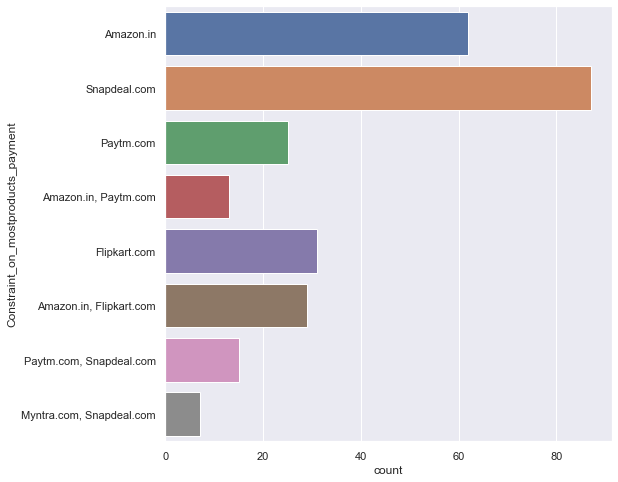

In [47]:
#Plotting countplot and piechart foR Constraint_on_mostproducts_payment column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Constraint_on_mostproducts_payment", data=df)
fig = px.pie(df, names='Constraint_on_mostproducts_payment', title='Less options of the payment methods on most products')
fig.show()

>We can clearly see from the plot that "Snapdeal" has constraints on payment methods for many products followed by "Amazon".

>Myntra and snapdeal are open to different payment methods.

In [48]:
df.columns

Index(['Gender', 'Age', 'Shopping_city', 'Pin_code_City',
       'Shopping_Exp_Online', 'No_of_purchase_lastyear', 'Internet_Type',
       'Device_shopping', 'Screensize_Mobile', 'Operating_system', 'Browser',
       'mode_of_conn_online_store ', 'Mode _of_conn_again',
       'Time_duration_purchase', 'Payment_mode', 'Frequency_abandoning_items',
       'Abandoned_bag_reasons', 'content_of_website_easy_toread_understand',
       'similar_product_comparision_imp',
       'complete_info_listed_seller_product_imp_for_purchase_decision',
       'All_relevant_information_on_listed_products_must_be_stated_clearly',
       'Ease of navigation in website', 'loading_processing_speed',
       'userfriendly_interface_website', 'Convenient_pay_methods',
       'Trust_online_store_fulfill_itspart_oftransaction_intime',
       'Readiness_to_help_customers', 'Guarantee_privacy_of_customers',
       'Customer_support_availability_by_modes',
       'Monetary_benefits_online_shopping_discounts',
       

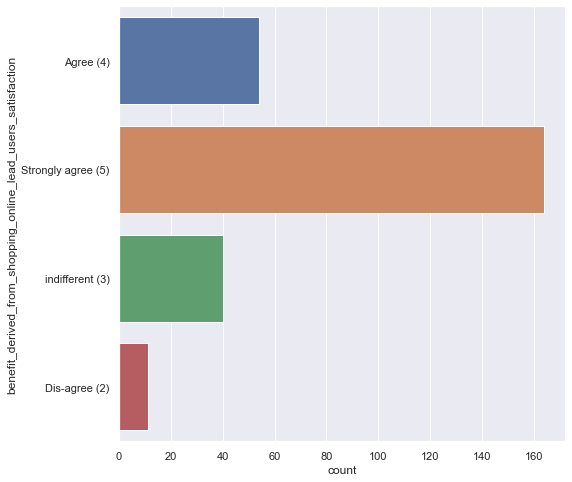

In [49]:
#Plotting countplot and piechart foR benefit_derived_from_shopping_online_lead_users_satisfaction column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="benefit_derived_from_shopping_online_lead_users_satisfaction", data=df)
fig = px.pie(df, names='benefit_derived_from_shopping_online_lead_users_satisfaction', title='Benefits derived from shopping online,lead to users satisfaction')
fig.show()

>We can see that from the plots that many customers believe that benefit derived from the online shopping leads to customer satisfaction.

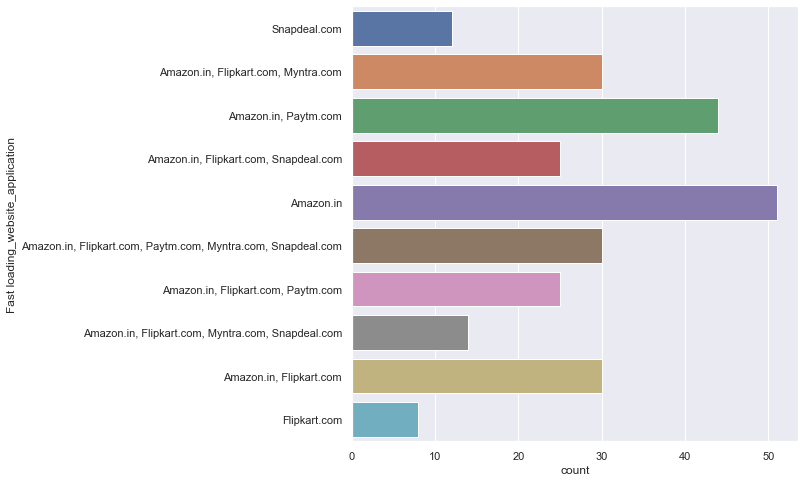

In [50]:
#Plotting countplot and piechart foR Fast loading_website_application column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Fast loading_website_application", data=df)
fig = px.pie(df, names='Fast loading_website_application', title='Fast loading website application')
fig.show()

>We can see from the plots that fastest loading website is "amazon.in".

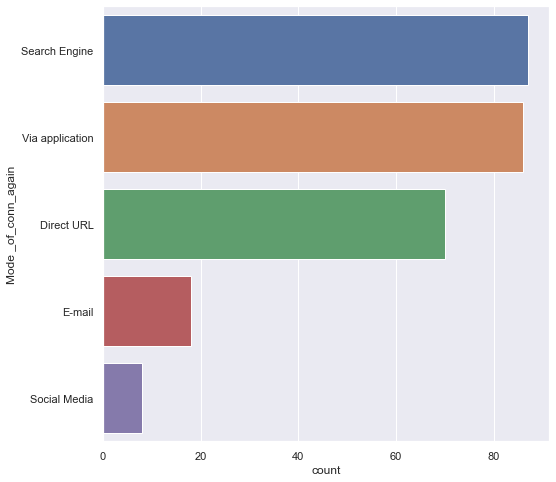

In [52]:
#Plotting countplot and piechart Mode _of_conn_again column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Mode _of_conn_again", data=df)
fig = px.pie(df, names='Mode _of_conn_again', title='Mode of the visiting the online stores website again')
fig.show()

>We can clearly see that most of people visiting websites again through "Search Engine" followed by "Application of the retailers" and "Direct_URL".

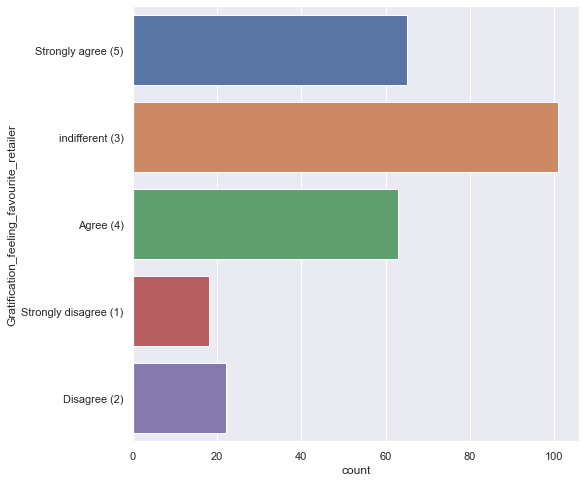

In [54]:
#Plotting countplot and piechart Gratification_feeling_favourite_retailer column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Gratification_feeling_favourite_retailer", data=df)
fig = px.pie(df, names='Gratification_feeling_favourite_retailer', title='Mode of the visiting the online stores website again')
fig.show()

>>We can see from the above plots that there is some mixed kind of response on "Gratification feeling while shopping from the favourite retailer",most of the respondent are not concerned about it,some of very strongly concerned about it.

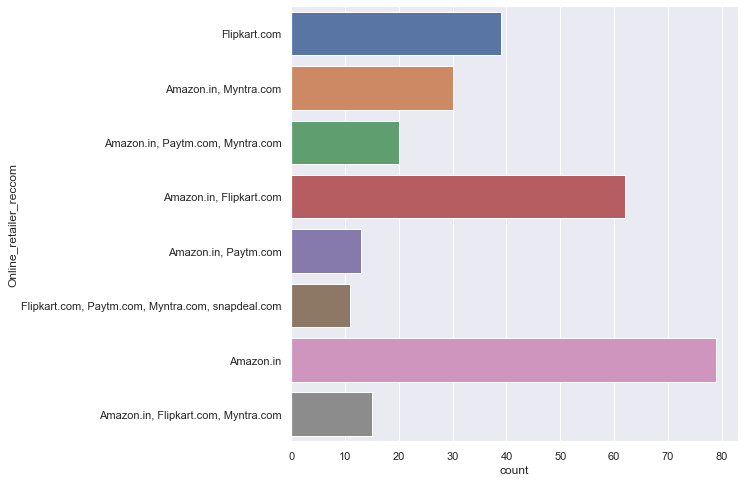

In [58]:
#Plotting countplot and piechart online_retailer_reccomendation column.
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(y="Online_retailer_reccom", data=df)
fig = px.pie(df, names='Online_retailer_reccom', title='Which online retailer will you recommend to your friends?.')
fig.show()

>We can see that the best choice of most of the people is "Amazon" followed by "Flipkart" & "Myntra".

>Very few people will recommend "Snapdeal" & "Paytm".

# Conclusions/Insights

>Amazon.in is the peoples favorite choice for the online shopping ,since it is offering the sales of its products with various additional benefits like “Fastest delivering orders", "Fastest loading  and responsive website", "More  products are available for any section of item” etc.

>Flipkart is also performing good but it comes after the Amazon.

>Least rated online retailer companies are Snapdeal.com and Paytm.com ,very less proportion of the population are following them due to the various reasons like “Very long delivery periods", "Slow loading website", "Less  varieties  of the products are listed on them” etc.
